In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("zomato(1).csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.drop(["url","address","phone","menu_item","reviews_list"],axis=1,inplace=True)

In [5]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [6]:
df.isnull().any()

name                           False
online_order                   False
book_table                     False
rate                            True
votes                          False
location                        True
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
listed_in(type)                False
listed_in(city)                False
dtype: bool

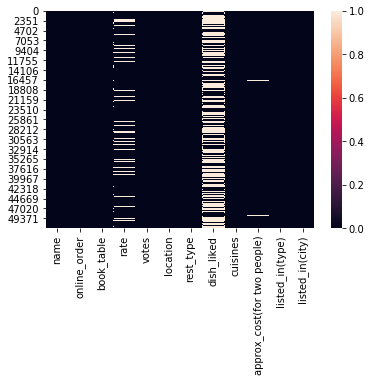

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
df.drop(['dish_liked'],axis=1,inplace=True)

In [9]:
df.shape

(51717, 11)

In [10]:
df['rate'].isnull().sum()

7775

In [11]:
df['location'].isnull().sum()

21

In [12]:
df['rest_type'].isnull().sum()

227

In [13]:
df['cuisines'].isnull().sum()

45

In [14]:
df['approx_cost(for two people)'].isnull().sum()

346

In [15]:
df["location"].fillna(df['location'].mode()[0],inplace=True)
df["cuisines"].fillna(df['cuisines'].mode()[0],inplace=True)
df["rest_type"].fillna(df['rest_type'].mode()[0],inplace=True)
df["approx_cost(for two people)"].fillna(df['approx_cost(for two people)'].mode()[0],inplace=True)
df["rate"].fillna(df['rate'].mode()[0],inplace=True)

In [16]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
rate_list=list(df['rate'])

In [18]:
rate_list

['4.1/5',
 '4.1/5',
 '3.8/5',
 '3.7/5',
 '3.8/5',
 '3.8/5',
 '3.6/5',
 '4.6/5',
 '4.0/5',
 '4.2/5',
 '4.1/5',
 '4.2/5',
 '4.2/5',
 '4.0/5',
 '3.8/5',
 '3.8/5',
 '3.9/5',
 '3.8/5',
 '3.9/5',
 '3.1/5',
 '3.0/5',
 '3.7/5',
 '3.6/5',
 '3.6/5',
 '3.7/5',
 '3.2/5',
 '3.8/5',
 '3.3/5',
 '3.3/5',
 '3.8/5',
 '4.0/5',
 '2.8/5',
 '3.9/5',
 '3.9/5',
 '4.2/5',
 '3.9/5',
 '2.8/5',
 '4.2/5',
 '4.4/5',
 '4.0/5',
 '3.8/5',
 '3.9/5',
 '3.9/5',
 '3.9/5',
 '4.6/5',
 '3.8/5',
 '3.6/5',
 '4.0/5',
 '3.7/5',
 '3.1/5',
 '3.7/5',
 '4.1/5',
 '4.3/5',
 '4.0/5',
 '4.0/5',
 '3.9/5',
 '3.8/5',
 '4.2/5',
 '3.6/5',
 '3.7/5',
 '4.2/5',
 '3.6/5',
 '3.8/5',
 '4.0/5',
 '3.7/5',
 '4.1/5',
 '3.6/5',
 '4.1/5',
 '3.8/5',
 '3.2/5',
 '3.6/5',
 '4.1/5',
 'NEW',
 '2.9/5',
 '3.6/5',
 'NEW',
 '4.1/5',
 '3.6/5',
 '3.7/5',
 '3.8/5',
 '3.8/5',
 '4.2/5',
 '3.5/5',
 '3.8/5',
 'NEW',
 '4.0/5',
 '4.4/5',
 '3.5/5',
 '3.5/5',
 '3.7/5',
 'NEW',
 'NEW',
 'NEW',
 '3.2/5',
 '2.6/5',
 '3.3/5',
 '3.8/5',
 '3.7/5',
 '3.7/5',
 '3.8/5',
 '3.5/5',
 '

In [19]:
removetable=str.maketrans('','','/')
lo=[s.translate(removetable) for s in rate_list]

In [20]:
lo

['4.15',
 '4.15',
 '3.85',
 '3.75',
 '3.85',
 '3.85',
 '3.65',
 '4.65',
 '4.05',
 '4.25',
 '4.15',
 '4.25',
 '4.25',
 '4.05',
 '3.85',
 '3.85',
 '3.95',
 '3.85',
 '3.95',
 '3.15',
 '3.05',
 '3.75',
 '3.65',
 '3.65',
 '3.75',
 '3.25',
 '3.85',
 '3.35',
 '3.35',
 '3.85',
 '4.05',
 '2.85',
 '3.95',
 '3.95',
 '4.25',
 '3.95',
 '2.85',
 '4.25',
 '4.45',
 '4.05',
 '3.85',
 '3.95',
 '3.95',
 '3.95',
 '4.65',
 '3.85',
 '3.65',
 '4.05',
 '3.75',
 '3.15',
 '3.75',
 '4.15',
 '4.35',
 '4.05',
 '4.05',
 '3.95',
 '3.85',
 '4.25',
 '3.65',
 '3.75',
 '4.25',
 '3.65',
 '3.85',
 '4.05',
 '3.75',
 '4.15',
 '3.65',
 '4.15',
 '3.85',
 '3.25',
 '3.65',
 '4.15',
 'NEW',
 '2.95',
 '3.65',
 'NEW',
 '4.15',
 '3.65',
 '3.75',
 '3.85',
 '3.85',
 '4.25',
 '3.55',
 '3.85',
 'NEW',
 '4.05',
 '4.45',
 '3.55',
 '3.55',
 '3.75',
 'NEW',
 'NEW',
 'NEW',
 '3.25',
 '2.65',
 '3.35',
 '3.85',
 '3.75',
 '3.75',
 '3.85',
 '3.55',
 '3.75',
 '3.55',
 '3.8 5',
 '3.25',
 '3.55',
 '3.45',
 'NEW',
 '3.25',
 '3.25',
 'NEW',
 '3.15',

In [21]:
df1=pd.DataFrame(lo,columns=['LO1'])


In [22]:
df1

,LO1
0,4.15
1,4.15
2,3.85
3,3.75
4,3.85
5,3.85
6,3.65
7,4.65
8,4.05
9,4.25


In [23]:
df1['LO1']=df1['LO1'].replace(
{
    "NEW" : np.NaN
}
)

In [24]:
new_list=list(df1['LO1'])

In [25]:
df["rates"]=new_list

In [26]:
df=df.dropna(how='any',axis=0)

In [27]:
df.shape

(41734, 12)

In [28]:
df.drop(['rate'],axis=1,inplace=True)

In [29]:
df

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rates
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.15
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,4.15
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.85
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,3.75
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,3.85
5,Timepass Dinner,Yes,No,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari,3.85
6,Rosewood International Hotel - Bar & Restaurant,No,No,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari,3.65
7,Onesta,Yes,Yes,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari,4.65
8,Penthouse Cafe,Yes,No,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari,4.05
9,Smacznego,Yes,No,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari,4.25


In [30]:
rates_str=list(df['rates'])

In [31]:
rates_str

['4.15',
 '4.15',
 '3.85',
 '3.75',
 '3.85',
 '3.85',
 '3.65',
 '4.65',
 '4.05',
 '4.25',
 '4.15',
 '4.25',
 '4.25',
 '4.05',
 '3.85',
 '3.85',
 '3.95',
 '3.85',
 '3.95',
 '3.15',
 '3.05',
 '3.75',
 '3.65',
 '3.65',
 '3.75',
 '3.25',
 '3.85',
 '3.35',
 '3.35',
 '3.85',
 '4.05',
 '2.85',
 '3.95',
 '3.95',
 '4.25',
 '3.95',
 '2.85',
 '4.25',
 '4.45',
 '4.05',
 '3.85',
 '3.95',
 '3.95',
 '3.95',
 '4.65',
 '3.85',
 '3.65',
 '4.05',
 '3.75',
 '3.15',
 '3.75',
 '4.15',
 '4.35',
 '4.05',
 '4.05',
 '3.95',
 '3.85',
 '4.25',
 '3.65',
 '3.75',
 '4.25',
 '3.65',
 '3.85',
 '4.05',
 '3.75',
 '4.15',
 '3.65',
 '4.15',
 '3.85',
 '3.25',
 '3.65',
 '4.15',
 '2.95',
 '3.65',
 '4.15',
 '3.65',
 '3.75',
 '3.85',
 '3.85',
 '4.25',
 '3.55',
 '3.85',
 '4.05',
 '4.45',
 '3.55',
 '3.55',
 '3.75',
 '3.25',
 '2.65',
 '3.35',
 '3.85',
 '3.75',
 '3.75',
 '3.85',
 '3.55',
 '3.75',
 '3.55',
 '3.8 5',
 '3.25',
 '3.55',
 '3.45',
 '3.25',
 '3.25',
 '3.15',
 '3.45',
 '3.15',
 '4.15',
 '3.35',
 '3.15',
 '3.35',
 '2.95',


In [32]:
#my_strings = ['aaaaaa', 'bbbb', 'ccc']
ss=[]
for el in rates_str:
    ss.append(el[:3])
    

In [33]:
removetable=str.maketrans('','','-:')
loqq=[s.translate(removetable) for s in ss]

In [34]:
ss

['4.1',
 '4.1',
 '3.8',
 '3.7',
 '3.8',
 '3.8',
 '3.6',
 '4.6',
 '4.0',
 '4.2',
 '4.1',
 '4.2',
 '4.2',
 '4.0',
 '3.8',
 '3.8',
 '3.9',
 '3.8',
 '3.9',
 '3.1',
 '3.0',
 '3.7',
 '3.6',
 '3.6',
 '3.7',
 '3.2',
 '3.8',
 '3.3',
 '3.3',
 '3.8',
 '4.0',
 '2.8',
 '3.9',
 '3.9',
 '4.2',
 '3.9',
 '2.8',
 '4.2',
 '4.4',
 '4.0',
 '3.8',
 '3.9',
 '3.9',
 '3.9',
 '4.6',
 '3.8',
 '3.6',
 '4.0',
 '3.7',
 '3.1',
 '3.7',
 '4.1',
 '4.3',
 '4.0',
 '4.0',
 '3.9',
 '3.8',
 '4.2',
 '3.6',
 '3.7',
 '4.2',
 '3.6',
 '3.8',
 '4.0',
 '3.7',
 '4.1',
 '3.6',
 '4.1',
 '3.8',
 '3.2',
 '3.6',
 '4.1',
 '2.9',
 '3.6',
 '4.1',
 '3.6',
 '3.7',
 '3.8',
 '3.8',
 '4.2',
 '3.5',
 '3.8',
 '4.0',
 '4.4',
 '3.5',
 '3.5',
 '3.7',
 '3.2',
 '2.6',
 '3.3',
 '3.8',
 '3.7',
 '3.7',
 '3.8',
 '3.5',
 '3.7',
 '3.5',
 '3.8',
 '3.2',
 '3.5',
 '3.4',
 '3.2',
 '3.2',
 '3.1',
 '3.4',
 '3.1',
 '4.1',
 '3.3',
 '3.1',
 '3.3',
 '2.9',
 '3.3',
 '4.0',
 '3.0',
 '3.9',
 '4.1',
 '3.8',
 '3.8',
 '3.8',
 '4.1',
 '3.8',
 '4.1',
 '3.7',
 '3.9',
 '3.0',


In [35]:
df['ratings']=ss

In [36]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rates,ratings
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.15,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,4.15,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.85,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,3.75,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,3.85,3.8


In [37]:
qw=[]
for i in ss:
    if i > '3.7':
        qw.append('1')
    else:
        qw.append('0')

In [38]:
df['hit']=qw

In [39]:
df['hit'].value_counts()

0    21490
1    20244
Name: hit, dtype: int64

In [40]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rates,ratings,hit
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.15,4.1,1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,4.15,4.1,1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.85,3.8,1
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,3.75,3.7,0
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,3.85,3.8,1


In [41]:
df.isnull().any()

name                           False
online_order                   False
book_table                     False
votes                          False
location                       False
rest_type                      False
cuisines                       False
approx_cost(for two people)    False
listed_in(type)                False
listed_in(city)                False
rates                          False
ratings                        False
hit                            False
dtype: bool

### Data Visualisation

In [42]:
yesss=df.loc[df["hit"] == '1']
nooo=df.loc[df["hit"] == '0']

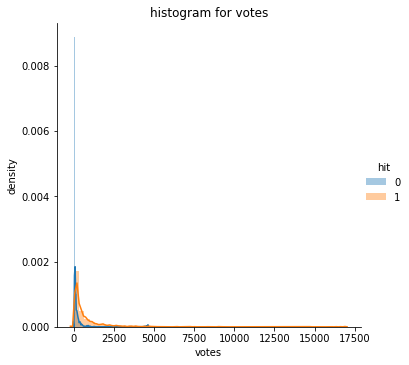

In [43]:
sns.FacetGrid(df, hue="hit", size=5) \
   .map(sns.distplot, "votes") \
   .add_legend()
plt.title("histogram for votes")
plt.ylabel("density")
#p3.savefig("p3.png")
plt.show()

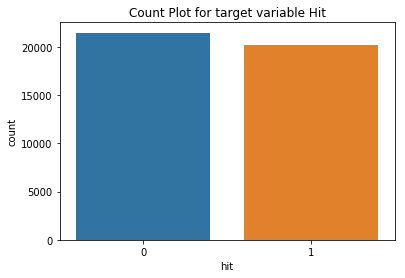

In [44]:
sns.countplot(data=df,x="hit")
plt.title("Count Plot for target variable Hit")
plt.show()

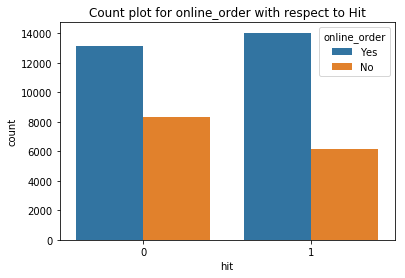

In [45]:
sns.countplot(data=df,x="hit",hue="online_order")
plt.title("Count plot for online_order with respect to Hit")
plt.show()

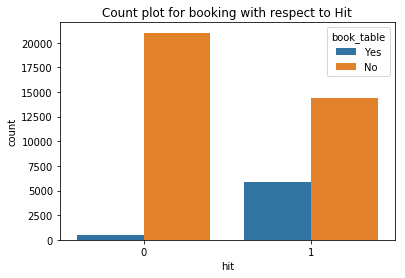

In [46]:
sns.countplot(data=df,x="hit",hue="book_table")
plt.title("Count plot for booking with respect to Hit")
plt.show()

In [47]:
df['listed_in(city)'].value_counts()

BTM                      2610
Koramangala 7th Block    2390
Koramangala 4th Block    2280
Koramangala 5th Block    2277
Koramangala 6th Block    2189
Jayanagar                1928
JP Nagar                 1650
Indiranagar              1558
MG Road                  1532
Church Street            1525
Brigade Road             1484
Lavelle Road             1458
Residency Road           1359
HSR                      1341
Marathahalli             1314
Bannerghatta Road        1217
Whitefield               1214
Old Airport Road         1210
Brookefield              1150
Basavanagudi             1088
Sarjapur Road            1039
Kammanahalli             1034
Kalyan Nagar             1006
Bellandur                 971
Frazer Town               957
Malleshwaram              947
Rajajinagar               878
Electronic City           828
Banashankari              728
New BEL Road              572
Name: listed_in(city), dtype: int64

In [48]:
df['listed_in(type)'].value_counts()

Delivery              20698
Dine-out              14224
Desserts               2735
Cafes                  1526
Drinks & nightlife     1055
Buffet                  855
Pubs and bars           641
Name: listed_in(type), dtype: int64

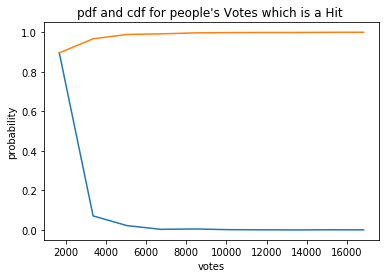

In [49]:
counts, bin_edges = np.histogram(yesss['votes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf for people's Votes which is a Hit ")

plt.xlabel("votes")
plt.ylabel("probability")
plt.show()

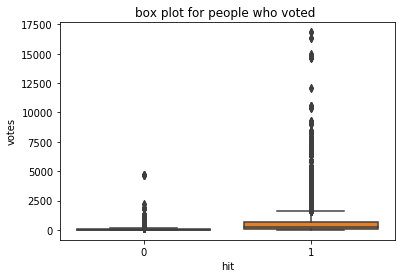

In [50]:
sns.boxplot(x="hit", y="votes", data=df)
plt.title("box plot for people who voted ")
plt.show()

In [51]:
def stack_plot(df, xtick, col2='hit', col3='total'):
    ind = np.arange(df.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, df[col3].values)
    p2 = plt.bar(ind, df[col2].values)

    plt.ylabel('Restaurant types')
    plt.title('hotel is Hit or Not')
    plt.xticks(ind, list(df[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [52]:
def univariate_barplots(df, col1, col2='hit', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq("yes").sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    #temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

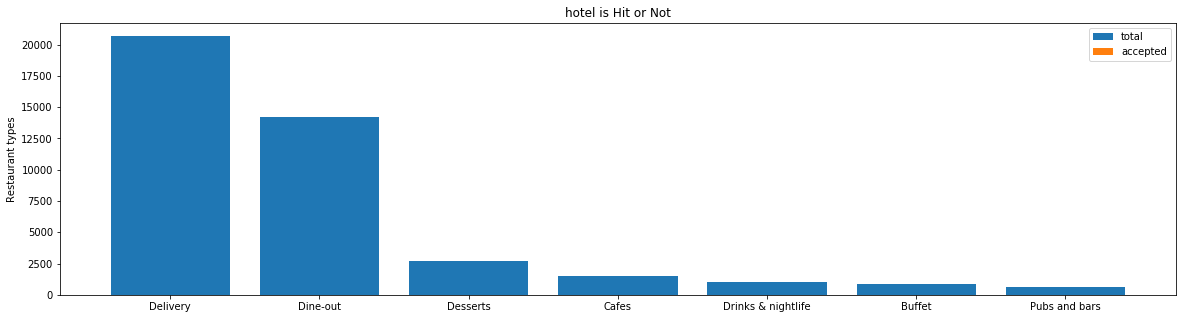

      listed_in(type)  hit  total
2            Delivery    0  20698
4            Dine-out    0  14224
3            Desserts    0   2735
1               Cafes    0   1526
5  Drinks & nightlife    0   1055
      listed_in(type)  hit  total
3            Desserts    0   2735
1               Cafes    0   1526
5  Drinks & nightlife    0   1055
0              Buffet    0    855
6       Pubs and bars    0    641


In [53]:
univariate_barplots(df, 'listed_in(type)', 'hit', False)

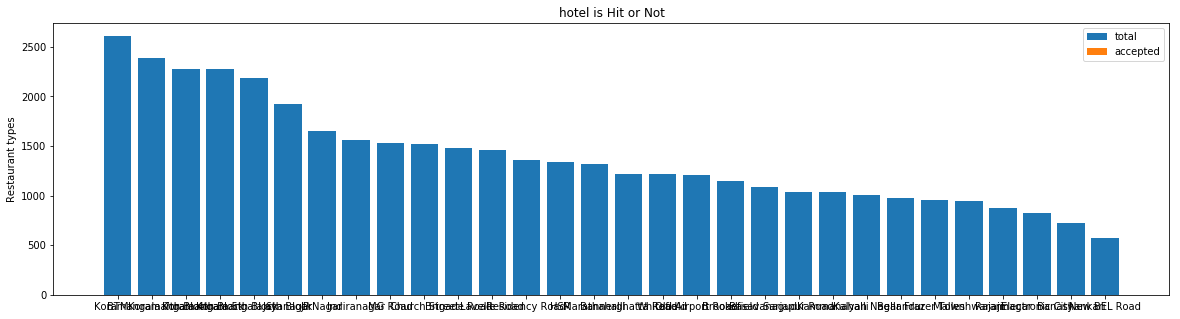

          listed_in(city)  hit  total
0                     BTM    0   2610
19  Koramangala 7th Block    0   2390
16  Koramangala 4th Block    0   2280
17  Koramangala 5th Block    0   2277
18  Koramangala 6th Block    0   2189
    listed_in(city)  hit  total
22     Malleshwaram    0    947
26      Rajajinagar    0    878
8   Electronic City    0    828
1      Banashankari    0    728
24     New BEL Road    0    572


In [54]:
univariate_barplots(df, 'listed_in(city)', 'hit', False)

In [55]:
df.drop(['rates','name','location','rest_type','cuisines'],axis=1,inplace=True)

### Data preprocessing for Model building

In [56]:
df.head()

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),ratings,hit
0,Yes,Yes,775,800,Buffet,Banashankari,4.1,1
1,Yes,No,787,800,Buffet,Banashankari,4.1,1
2,Yes,No,918,800,Buffet,Banashankari,3.8,1
3,No,No,88,300,Buffet,Banashankari,3.7,0
4,No,No,166,600,Buffet,Banashankari,3.8,1


In [57]:
x=df.iloc[:,0:7].values
y=df.iloc[:,7]

In [58]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [59]:
x[:,0]=lb.fit_transform(x[:,0])
x[:,1]=lb.fit_transform(x[:,1])
x[:,3]=lb.fit_transform(x[:,3])
x[:,4]=lb.fit_transform(x[:,4])



In [60]:
x

array([[1, 1, 775, ..., 0, 'Banashankari', '4.1'],
       [1, 0, 787, ..., 0, 'Banashankari', '4.1'],
       [1, 0, 918, ..., 0, 'Banashankari', '3.8'],
       ...,
       [0, 0, 27, ..., 6, 'Whitefield', '3.6'],
       [0, 1, 236, ..., 6, 'Whitefield', '4.3'],
       [0, 0, 13, ..., 6, 'Whitefield', '3.4']], dtype=object)

In [61]:
df.head()

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),ratings,hit
0,Yes,Yes,775,800,Buffet,Banashankari,4.1,1
1,Yes,No,787,800,Buffet,Banashankari,4.1,1
2,Yes,No,918,800,Buffet,Banashankari,3.8,1
3,No,No,88,300,Buffet,Banashankari,3.7,0
4,No,No,166,600,Buffet,Banashankari,3.8,1


In [62]:
app_str=list(df['approx_cost(for two people)'])

In [63]:
removetable=str.maketrans('','',',')
loqw=[s.translate(removetable) for s in app_str]

In [64]:
wss=list(df['listed_in(type)'])

In [65]:
removetable=str.maketrans('','','-&')
lows=[s.translate(removetable) for s in wss]

In [66]:
df['listed_type']=lows

In [67]:
loqw

['800',
 '800',
 '800',
 '300',
 '600',
 '600',
 '800',
 '600',
 '700',
 '550',
 '500',
 '600',
 '500',
 '450',
 '800',
 '650',
 '800',
 '700',
 '300',
 '400',
 '400',
 '500',
 '900',
 '600',
 '300',
 '600',
 '200',
 '500',
 '550',
 '550',
 '600',
 '500',
 '500',
 '750',
 '500',
 '650',
 '400',
 '600',
 '750',
 '150',
 '200',
 '300',
 '500',
 '800',
 '600',
 '400',
 '300',
 '450',
 '850',
 '300',
 '450',
 '150',
 '400',
 '750',
 '450',
 '450',
 '300',
 '800',
 '200',
 '400',
 '800',
 '800',
 '150',
 '850',
 '150',
 '400',
 '100',
 '1200',
 '300',
 '600',
 '500',
 '300',
 '700',
 '300',
 '150',
 '300',
 '500',
 '350',
 '500',
 '400',
 '200',
 '700',
 '300',
 '600',
 '200',
 '500',
 '250',
 '300',
 '600',
 '800',
 '250',
 '950',
 '300',
 '400',
 '300',
 '200',
 '300',
 '400',
 '600',
 '300',
 '300',
 '300',
 '300',
 '150',
 '400',
 '1000',
 '300',
 '200',
 '100',
 '200',
 '200',
 '100',
 '450',
 '800',
 '200',
 '500',
 '300',
 '650',
 '400',
 '500',
 '450',
 '500',
 '750',
 '150',
 '250'

In [68]:
df['approx_cost']=loqw

In [69]:
df.drop(['approx_cost(for two people)'],axis=1,inplace=True)

In [70]:
df.head()

,online_order,book_table,votes,listed_in(type),listed_in(city),ratings,hit,listed_type,approx_cost
0,Yes,Yes,775,Buffet,Banashankari,4.1,1,Buffet,800
1,Yes,No,787,Buffet,Banashankari,4.1,1,Buffet,800
2,Yes,No,918,Buffet,Banashankari,3.8,1,Buffet,800
3,No,No,88,Buffet,Banashankari,3.7,0,Buffet,300
4,No,No,166,Buffet,Banashankari,3.8,1,Buffet,600


In [71]:
df=df[['online_order','book_table','votes','listed_type','listed_in(city)','ratings','approx_cost','hit']]

In [72]:
df.shape

(41734, 8)

In [73]:
df.reset_index(drop=True,inplace=True)

In [74]:
df

,online_order,book_table,votes,listed_type,listed_in(city),ratings,approx_cost,hit
0,Yes,Yes,775,Buffet,Banashankari,4.1,800,1
1,Yes,No,787,Buffet,Banashankari,4.1,800,1
2,Yes,No,918,Buffet,Banashankari,3.8,800,1
3,No,No,88,Buffet,Banashankari,3.7,300,0
4,No,No,166,Buffet,Banashankari,3.8,600,1
5,Yes,No,286,Buffet,Banashankari,3.8,600,1
6,No,No,8,Buffet,Banashankari,3.6,800,0
7,Yes,Yes,2556,Cafes,Banashankari,4.6,600,1
8,Yes,No,324,Cafes,Banashankari,4.0,700,1
9,Yes,No,504,Cafes,Banashankari,4.2,550,1


In [75]:
df['listed_type'].value_counts()

Delivery             20698
Dineout              14224
Desserts              2735
Cafes                 1526
Drinks  nightlife     1055
Buffet                 855
Pubs and bars          641
Name: listed_type, dtype: int64

In [76]:
df.shape

(41734, 8)

In [77]:
df1=pd.get_dummies(df,prefix=['listed_type','listed_city'],columns=['listed_type','listed_in(city)'])

In [78]:
df1.head()

,online_order,book_table,votes,ratings,approx_cost,hit,listed_type_Buffet,listed_type_Cafes,listed_type_Delivery,listed_type_Desserts,...,listed_city_Lavelle Road,listed_city_MG Road,listed_city_Malleshwaram,listed_city_Marathahalli,listed_city_New BEL Road,listed_city_Old Airport Road,listed_city_Rajajinagar,listed_city_Residency Road,listed_city_Sarjapur Road,listed_city_Whitefield
0,Yes,Yes,775,4.1,800,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,4.1,800,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,3.8,800,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,No,88,3.7,300,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No,No,166,3.8,600,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df1.shape

(41734, 43)

In [80]:
df1.isnull().any()

online_order                         False
book_table                           False
votes                                False
ratings                              False
approx_cost                          False
hit                                  False
listed_type_Buffet                   False
listed_type_Cafes                    False
listed_type_Delivery                 False
listed_type_Desserts                 False
listed_type_Dineout                  False
listed_type_Drinks  nightlife        False
listed_type_Pubs and bars            False
listed_city_BTM                      False
listed_city_Banashankari             False
listed_city_Bannerghatta Road        False
listed_city_Basavanagudi             False
listed_city_Bellandur                False
listed_city_Brigade Road             False
listed_city_Brookefield              False
listed_city_Church Street            False
listed_city_Electronic City          False
listed_city_Frazer Town              False
listed_city

In [81]:
 df1.drop(['listed_type_Buffet','listed_city_Whitefield'],axis=1,inplace=True)

In [82]:
df1.shape

(41734, 41)

In [83]:
df1.head()

,online_order,book_table,votes,ratings,approx_cost,hit,listed_type_Cafes,listed_type_Delivery,listed_type_Desserts,listed_type_Dineout,...,listed_city_Koramangala 7th Block,listed_city_Lavelle Road,listed_city_MG Road,listed_city_Malleshwaram,listed_city_Marathahalli,listed_city_New BEL Road,listed_city_Old Airport Road,listed_city_Rajajinagar,listed_city_Residency Road,listed_city_Sarjapur Road
0,Yes,Yes,775,4.1,800,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,4.1,800,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,3.8,800,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,No,88,3.7,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No,No,166,3.8,600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df1.columns

Index(['online_order', 'book_table', 'votes', 'ratings', 'approx_cost', 'hit',
       'listed_type_Cafes', 'listed_type_Delivery', 'listed_type_Desserts',
       'listed_type_Dineout', 'listed_type_Drinks  nightlife',
       'listed_type_Pubs and bars', 'listed_city_BTM',
       'listed_city_Banashankari', 'listed_city_Bannerghatta Road',
       'listed_city_Basavanagudi', 'listed_city_Bellandur',
       'listed_city_Brigade Road', 'listed_city_Brookefield',
       'listed_city_Church Street', 'listed_city_Electronic City',
       'listed_city_Frazer Town', 'listed_city_HSR', 'listed_city_Indiranagar',
       'listed_city_JP Nagar', 'listed_city_Jayanagar',
       'listed_city_Kalyan Nagar', 'listed_city_Kammanahalli',
       'listed_city_Koramangala 4th Block',
       'listed_city_Koramangala 5th Block',
       'listed_city_Koramangala 6th Block',
       'listed_city_Koramangala 7th Block', 'listed_city_Lavelle Road',
       'listed_city_MG Road', 'listed_city_Malleshwaram',
       'l

In [85]:
df1=df1[['online_order', 'book_table', 'votes', 'ratings', 'approx_cost',
       'listed_type_Cafes', 'listed_type_Delivery', 'listed_type_Desserts',
       'listed_type_Dineout', 'listed_type_Drinks  nightlife',
       'listed_type_Pubs and bars', 'listed_city_BTM',
       'listed_city_Banashankari', 'listed_city_Bannerghatta Road',
       'listed_city_Basavanagudi', 'listed_city_Bellandur',
       'listed_city_Brigade Road', 'listed_city_Brookefield',
       'listed_city_Church Street', 'listed_city_Electronic City',
       'listed_city_Frazer Town', 'listed_city_HSR', 'listed_city_Indiranagar',
       'listed_city_JP Nagar', 'listed_city_Jayanagar',
       'listed_city_Kalyan Nagar', 'listed_city_Kammanahalli',
       'listed_city_Koramangala 4th Block',
       'listed_city_Koramangala 5th Block',
       'listed_city_Koramangala 6th Block',
       'listed_city_Koramangala 7th Block', 'listed_city_Lavelle Road',
       'listed_city_MG Road', 'listed_city_Malleshwaram',
       'listed_city_Marathahalli', 'listed_city_New BEL Road',
       'listed_city_Old Airport Road', 'listed_city_Rajajinagar',
       'listed_city_Residency Road', 'listed_city_Sarjapur Road','hit']]

In [86]:
df1.head()

,online_order,book_table,votes,ratings,approx_cost,listed_type_Cafes,listed_type_Delivery,listed_type_Desserts,listed_type_Dineout,listed_type_Drinks nightlife,...,listed_city_Lavelle Road,listed_city_MG Road,listed_city_Malleshwaram,listed_city_Marathahalli,listed_city_New BEL Road,listed_city_Old Airport Road,listed_city_Rajajinagar,listed_city_Residency Road,listed_city_Sarjapur Road,hit
0,Yes,Yes,775,4.1,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Yes,No,787,4.1,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Yes,No,918,3.8,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,No,No,88,3.7,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No,No,166,3.8,600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
x=df1.iloc[:,:40].values
y=df1.iloc[:,40].values

In [88]:
x[:,0]=lb.fit_transform(x[:,0])
x[:,1]=lb.fit_transform(x[:,1])

In [89]:
x.shape

(41734, 40)

In [90]:
df1.dtypes

online_order                         object
book_table                           object
votes                                 int64
ratings                              object
approx_cost                          object
listed_type_Cafes                     uint8
listed_type_Delivery                  uint8
listed_type_Desserts                  uint8
listed_type_Dineout                   uint8
listed_type_Drinks  nightlife         uint8
listed_type_Pubs and bars             uint8
listed_city_BTM                       uint8
listed_city_Banashankari              uint8
listed_city_Bannerghatta Road         uint8
listed_city_Basavanagudi              uint8
listed_city_Bellandur                 uint8
listed_city_Brigade Road              uint8
listed_city_Brookefield               uint8
listed_city_Church Street             uint8
listed_city_Electronic City           uint8
listed_city_Frazer Town               uint8
listed_city_HSR                       uint8
listed_city_Indiranagar         

In [91]:
df1.head()

,online_order,book_table,votes,ratings,approx_cost,listed_type_Cafes,listed_type_Delivery,listed_type_Desserts,listed_type_Dineout,listed_type_Drinks nightlife,...,listed_city_Lavelle Road,listed_city_MG Road,listed_city_Malleshwaram,listed_city_Marathahalli,listed_city_New BEL Road,listed_city_Old Airport Road,listed_city_Rajajinagar,listed_city_Residency Road,listed_city_Sarjapur Road,hit
0,Yes,Yes,775,4.1,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Yes,No,787,4.1,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Yes,No,918,3.8,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,No,No,88,3.7,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No,No,166,3.8,600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
df1.loc[[2479]]

,online_order,book_table,votes,ratings,approx_cost,listed_type_Cafes,listed_type_Delivery,listed_type_Desserts,listed_type_Dineout,listed_type_Drinks nightlife,...,listed_city_Lavelle Road,listed_city_MG Road,listed_city_Malleshwaram,listed_city_Marathahalli,listed_city_New BEL Road,listed_city_Old Airport Road,listed_city_Rajajinagar,listed_city_Residency Road,listed_city_Sarjapur Road,hit
2479,No,No,0,-,400,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df1['ratings'].value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
-        69
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: ratings, dtype: int64

In [94]:
df1['ratings']=df1['ratings'].replace(
{
    "-" : np.NaN
}
)

In [95]:
df1['ratings'].isnull().any()

True

In [96]:
df1=df1.dropna(how='any',axis=0)

In [97]:
df1.shape

(41665, 41)

In [98]:
df1['approx_cost'].value_counts()

300     5517
400     5290
500     4109
600     3210
200     3173
250     2134
800     2079
700     1827
1000    1519
350     1357
150     1313
450     1228
1200     970
1500     907
650      747
750      742
550      708
900      667
100      638
1300     512
1100     491
1400     465
2000     356
1600     260
1700     243
1800     203
3000     162
850      149
2500     146
2200      78
        ... 
2800      45
4000      29
3500      25
2400      23
1350      18
180       17
3400      13
2300      11
230       10
2600      10
1250       8
130        8
40         8
50         6
1650       6
1450       5
199        4
1050       4
330        4
4100       4
2700       3
4500       2
120        2
3200       2
240        2
6000       2
80         1
5000       1
70         1
3700       1
Name: approx_cost, Length: 63, dtype: int64

In [99]:
df1['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '1100', '1600', '230', '130',
       '1700', '1350', '2200', '1400', '2000', '1800', '1900', '180',
       '330', '2500', '2100', '3000', '2800', '3400', '50', '40', '1250',
       '3500', '4000', '2400', '2600', '1450', '70', '3200', '240',
       '6000', '1050', '2300', '4100', '120', '5000', '3700', '1650',
       '2700', '4500', '80'], dtype=object)

In [100]:
df1['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [101]:
df1['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [102]:
df1.dtypes

online_order                         object
book_table                           object
votes                                 int64
ratings                              object
approx_cost                          object
listed_type_Cafes                     uint8
listed_type_Delivery                  uint8
listed_type_Desserts                  uint8
listed_type_Dineout                   uint8
listed_type_Drinks  nightlife         uint8
listed_type_Pubs and bars             uint8
listed_city_BTM                       uint8
listed_city_Banashankari              uint8
listed_city_Bannerghatta Road         uint8
listed_city_Basavanagudi              uint8
listed_city_Bellandur                 uint8
listed_city_Brigade Road              uint8
listed_city_Brookefield               uint8
listed_city_Church Street             uint8
listed_city_Electronic City           uint8
listed_city_Frazer Town               uint8
listed_city_HSR                       uint8
listed_city_Indiranagar         

In [103]:
df1['hit']=df1.hit.astype(int)
df1['ratings']=df1.ratings.astype(float)


In [104]:
df1

,online_order,book_table,votes,ratings,approx_cost,listed_type_Cafes,listed_type_Delivery,listed_type_Desserts,listed_type_Dineout,listed_type_Drinks nightlife,...,listed_city_Lavelle Road,listed_city_MG Road,listed_city_Malleshwaram,listed_city_Marathahalli,listed_city_New BEL Road,listed_city_Old Airport Road,listed_city_Rajajinagar,listed_city_Residency Road,listed_city_Sarjapur Road,hit
0,Yes,Yes,775,4.1,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Yes,No,787,4.1,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Yes,No,918,3.8,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,No,No,88,3.7,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No,No,166,3.8,600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Yes,No,286,3.8,600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,No,No,8,3.6,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Yes,Yes,2556,4.6,600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Yes,No,324,4.0,700,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,Yes,No,504,4.2,550,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
x=df1.iloc[:,:40].values
y=df1.iloc[:,40].values

In [106]:
x[:,0]=lb.fit_transform(x[:,0])
x[:,1]=lb.fit_transform(x[:,1])

In [107]:
x.shape

(41665, 40)

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
print("TRAINING DATA")
print("X_train Shape : ",x_train.shape)
print("Y_train Shape : ",y_train.shape)
print("*"*50)
print("*"*50)
print("TESTING DATA")
print("X_test Shape : ",x_test.shape)
print("X_test Shape : ",y_test.shape)

TRAINING DATA
X_train Shape :  (33332, 40)
Y_train Shape :  (33332,)
**************************************************
**************************************************
TESTING DATA
X_test Shape :  (8333, 40)
X_test Shape :  (8333,)


In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

C:\Users\Suhail hafiz khan\Anaconda3x\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [112]:
param_grid = {
    'max_depth': [80,100],
    'max_features': [2,3],
    'min_samples_leaf': [4,5],
    'n_estimators': [100,300]
}

In [113]:
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10,scoring = 'accuracy',verbose = 2)

In [114]:
grid_search_rf.fit(x_train,y_train)
print(grid_search_rf.best_estimator_)

y_pred_acc = grid_search_rf.predict(x_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100, total=   1.5s
[CV] max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100, total=   1.4s
[CV] max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100, total=   1.4s
[CV] max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100, total=   1.3s
[CV] max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100, total=   1.4s
[CV] max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100, total=   1.4s
[CV] max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100, total=   1.4s
[CV] max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=80, max_features=2

[CV]  max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300, total=   4.1s
[CV] max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300 
[CV]  max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300, total=   4.1s
[CV] max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300 
[CV]  max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300, total=   4.4s
[CV] max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300 
[CV]  max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300, total=   4.1s
[CV] max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300 
[CV]  max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300, total=   4.3s
[CV] max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300 
[CV]  max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300, total=   4.3s
[CV] max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=300 
[CV]  max_depth=80, max_features=3

[CV]  max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100, total=   1.8s
[CV] max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100, total=   2.0s
[CV] max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100, total=   1.7s
[CV] max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100, total=   1.9s
[CV] max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100, total=   1.9s
[CV] max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100, total=   1.5s
[CV] max_depth=100, max_features=2, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=100, m

[CV]  max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300, total=   4.2s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300 
[CV]  max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300, total=   4.1s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300 
[CV]  max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300, total=   4.2s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300 
[CV]  max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300, total=   4.2s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300 
[CV]  max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300, total=   4.2s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300 
[CV]  max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300, total=   4.1s


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 10.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [115]:
rf_optimised=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
rf_optimised.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
y_pred_rf=rf_optimised.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [120]:
print("Accuracy score : ",accuracy_score(y_pred_rf,y_test)*100,"%")

Accuracy score :  100.0 %


In [124]:
Cn=confusion_matrix(y_test,y_pred_rf)
Cn

array([[4325,    0],
       [   0, 4008]], dtype=int64)